# Sprawling indices: Batch mode
* Illustration of a simple way to calculate sprawling indices for several cities in batch-mode

In [1]:
# snippet for relative imports
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import matplotlib.pyplot as plt
import osmnx as ox
from src.core import process_spatial_indices, get_route_graph
from src.osm.osm_tags import activity_classification

ox.config(log_file=True, log_console=True, log_name='sprawl_batch', log_filename='sprawl_batch', use_cache=True)
figsize = (8,6)

# Sprawling indices
* Indices can be calculated in a batch mode

In [2]:
# Arguments
grid_step = 200
process_osm_args = {"retrieve_graph":True, "default_height":3, "meters_per_level":3, "associate_landuses_m2":True, "mixed_building_first_floor_activity":True, "minimum_m2_building_area":9, "date":None}
dispersion_args = {'radius_search': 750, 'use_median': False, 'K_nearest': 50}
landusemix_args = {'walkable_distance': 600, 'compute_activity_types_kde': True, 'weighted_kde': True, 
                   'pois_weight': 9, 'log_weighted': True}
accessibility_args = {'fixed_distance': True, 'fixed_activities': False, 'max_edge_length': 200, 
                      'max_node_distance': 250, 'fixed_distance_max_travel_distance': 2000, 
                      'fixed_distance_max_num_activities': 250, 'fixed_activities_min_number': 20}
indices_computation = {"dispersion":True, "landusemix":False, "accessibility":False}

## Define regions to process
* Cities names
* Regions of interest
    * Example: Stuttgart's region is determined using the second result of the query: https://www.openstreetmap.org/search?query=stuttgart#map=11/48.7788/9.1794

In [3]:
# Cities
cities_ref = [ "Florence", "Zagreb", "Stuttgart"]
regions_args = [ {"place":"Florence"}, {"place":"Zagreb"}, {"place":"Stuttgart", "which_result":2} ]

## Process spatial indices
* Results are computed in a geographical data frame for each city

In [4]:
df_indices = {}
for city_ref, region_arg in zip(cities_ref, regions_args):
    # Process spatial indices for input city
    df_indices[city_ref] = process_spatial_indices(city_ref, region_arg, grid_step, process_osm_args, dispersion_args, landusemix_args, accessibility_args, indices_computation)

## Visualization

			Florence
Dispersion


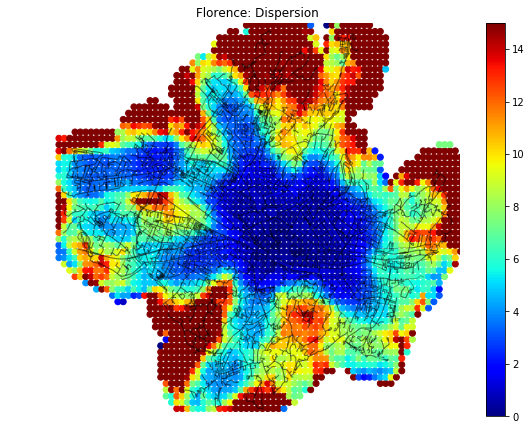

			Zagreb
Dispersion


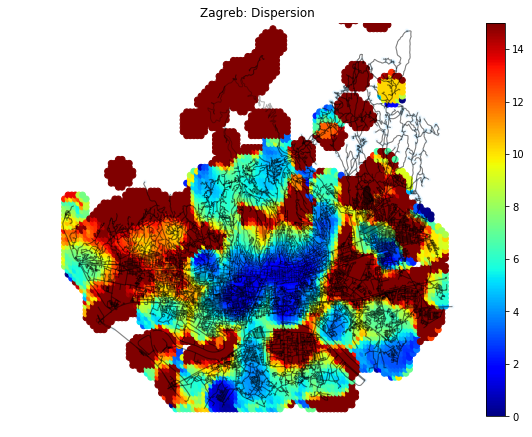

			Stuttgart
Dispersion


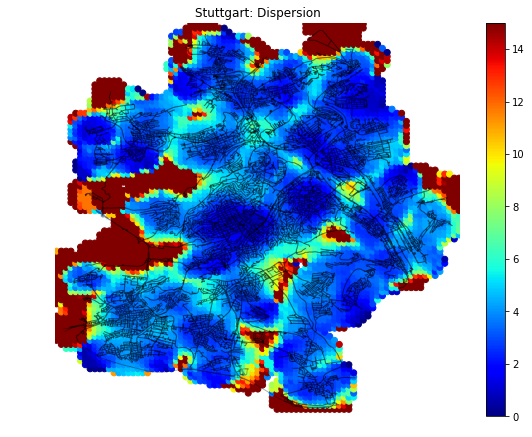

In [5]:
for city_ref in cities_ref:
    print("\t\t\t" + city_ref)
    df_indices_city = df_indices[city_ref]
    G = get_route_graph(city_ref)
    if (indices_computation.get("landusemix")):
        print("Land use mix")
        f, ax = ox.plot_graph(G, fig_height=figsize[1], fig_width=figsize[0], close=False, show=False, edge_color='black', edge_alpha=0.3, node_alpha=0.1)
        df_indices_city.plot('landusemix', figsize=figsize, cmap='jet', legend=True, ax=ax, markersize=50*df_indices_city.landuse_intensity)
        f.tight_layout(); ax.set_title(city_ref + ": Land use mix"); plt.show()
    
    if (indices_computation.get("accessibility")):
        print("Accessibility")
        f, ax = ox.plot_graph(G, fig_height=figsize[1], fig_width=figsize[0], close=False, show=False, edge_color='black', edge_alpha=0.3, node_alpha=0.1)
        df_indices_city.plot('accessibility', figsize=figsize, cmap='jet', legend=True, ax=ax)
        f.tight_layout(); ax.set_title(city_ref + ": Accessibility"); plt.show()
    
    if (indices_computation.get("dispersion")):
        print("Dispersion")
        f, ax = ox.plot_graph(G, fig_height=figsize[1], fig_width=figsize[0], close=False, show=False, edge_color='black', edge_alpha=0.3, node_alpha=0.1)
        df_indices_city.plot('dispersion', figsize=figsize, cmap='jet', legend=True, vmax=15, ax=ax)
        f.tight_layout(); ax.set_title(city_ref + ": Dispersion"); plt.show()